# Tercera entrega German Koning


## Abstract

El dataset proporciona mediciones de calidad del aire recopiladas entre marzo de 2004 y abril de 2005, con un total de 8991 entradas. Cada entrada está marcada con un índice temporal y contiene información sobre diversas variables relacionadas con la calidad del aire. Estos datos son esenciales para comprender y monitorear la contaminación atmosférica en un entorno específico.

Las variables registradas incluyen la concentración de monóxido de carbono (CO), hidrocarburos no metánicos (NMHC), óxidos de nitrógeno (NOx), dióxido de nitrógeno (NO2) y ozono (O3), medidas mediante diferentes sensores (denominados PT08.S1, PT08.S2, PT08.S3, PT08.S4 y PT08.S5, respectivamente). Además, se recopilaron datos sobre la fecha y la hora de cada medición.

Los datos de CO, NMHC, NOx, NO2 y O3 se presentan en diferentes unidades y formatos: algunos se registran como valores numéricos de punto flotante, mientras que otros se presentan como objetos. Esta heterogeneidad en los tipos de datos puede requerir un preprocesamiento cuidadoso para su análisis y modelado posterior.

Una inspección inicial revela que no hay valores nulos en el conjunto de datos, lo que sugiere una integridad completa de los registros. Sin embargo, la presencia de datos representados como objetos (como la fecha y la hora) podría requerir una conversión a formatos temporales adecuados para un análisis más preciso.

Este dataset tiene el potencial de ser utilizado en diversas aplicaciones, como la predicción de la calidad del aire, la identificación de patrones estacionales o diarios en la contaminación, o el análisis de la correlación entre diferentes contaminantes atmosféricos. Además, puede servir como base para modelos predictivos que ayuden a las autoridades ambientales y a la población en general a tomar medidas informadas para mejorar la calidad del aire y reducir los impactos negativos en la salud y el medio ambiente.

En resumen, este conjunto de datos ofrece una oportunidad valiosa para investigar y comprender la dinámica de la calidad del aire en el período de tiempo especificado, con implicaciones significativas en la salud pública y la toma de decisiones ambientales.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

## Calidad del aire

In [2]:
dfAir = pd.read_csv("./AirQualityUCI.csv", delimiter=';')

## Filtrar los datos

In [5]:
# Eliminar columnas no relevantes para el análisis
columns_to_drop = ['Unnamed: 15', 'Unnamed: 16','C6H6(GT)' ]
dfAir_filtered = dfAir.drop(columns=columns_to_drop)
# Eliminar filas con valores nulos en 'CO(GT)'
dfAir_filtered = dfAir_filtered.dropna(subset=['CO(GT)'])

# Suponiendo que 'Date' y 'Time' están en formato 'dd/mm/yyyy' y 'hh.mm.ss' respectivamente
dfAir_filtered['Datetime'] = pd.to_datetime(dfAir_filtered['Date'] + ' ' + dfAir_filtered['Time'], format='%d/%m/%Y %H.%M.%S')

# Luego, establecer la columna 'Datetime' como el nuevo índice
dfAir_filtered.set_index('Datetime', inplace=True)



# Convertir 'PT08.S1(CO)' a tipo numérico si no lo está en este momento
dfAir_filtered['PT08.S1(CO)'] = pd.to_numeric(dfAir_filtered['PT08.S1(CO)'], errors='coerce')

# Eliminar filas donde 'PT08.S1(CO)' es menor a 500
dfAir_filtered = dfAir_filtered[dfAir_filtered['PT08.S1(CO)'] >= 500]

# Mostrar estadísticas después de eliminar la
dfAir_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8991 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8991 non-null   object 
 1   Time           8991 non-null   object 
 2   CO(GT)         8991 non-null   object 
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        8991 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        8991 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   object 
 12  RH             8991 non-null   object 
 13  AH             8991 non-null   object 
dtypes: float64(8), object(6)
memory usage: 1.0+ MB


| Columna           | Descripción                                                                                          |
|-------------------|------------------------------------------------------------------------------------------------------|
| Date              | Fecha en la que se realizaron las mediciones de calidad del aire.                                     |
| Time              | Hora en la que se llevaron a cabo las mediciones.                                                      |
| CO(GT)            | Concentración de monóxido de carbono (CO) en el aire.                                                  |
| PT08.S1(CO)       | Lectura del sensor PT08.S1 relacionado con la concentración de CO en el aire.                          |
| NMHC(GT)          | Concentración de hidrocarburos no metánicos (NMHC) en el aire.                                         |
| PT08.S2(NMHC)     | Lectura del sensor PT08.S2 relacionado con la concentración de NMHC en el aire.                         |
| NOx(GT)           | Concentración de óxidos de nitrógeno (NOx) en el aire.                                                  |
| PT08.S3(NOx)      | Lectura del sensor PT08.S3 relacionado con la concentración de NOx en el aire.                          |
| NO2(GT)           | Concentración de dióxido de nitrógeno (NO2) en el aire.                                                  |
| PT08.S4(NO2)      | Lectura del sensor PT08.S4 relacionado con la concentración de NO2 en el aire.                           |
| PT08.S5(O3)       | Lectura del sensor PT08.S5 relacionado con la concentración de ozono (O3) en el aire.                   |
| T                 | Temperatura registrada durante las mediciones.                                                           |
| RH                | Humedad relativa registrada durante las mediciones.                                                      |
| AH                | Humedad absoluta registrada durante las mediciones.   


## Variables de interés en el dataset:

1. **Date y Time:**
   - Estas columnas representan la fecha y la hora de las observaciones. Son fundamentales para análisis temporales. En el contexto comercial, el análisis temporal podría ser crucial para identificar tendencias estacionales, cambios a lo largo del tiempo y patrones en el comportamiento de los datos.

2. **CO(GT), NMHC(GT), C6H6(GT), NOx(GT), NO2(GT):**
   - Estas columnas contienen mediciones de diferentes compuestos químicos en el aire. En un contexto analítico, estas variables podrían ser de interés para comprender la calidad del aire y su impacto en la salud pública. Comprender las fluctuaciones de estos compuestos a lo largo del tiempo podría ser crucial para tomar medidas preventivas o correctivas en ciertos lugares.
   
3. **Relación Temp-CO:**
    - Esta columna representa la relación entre la temperatura ambiente y la concentración de monóxido de carbono (CO) en el aire. Se calcula como la división de la temperatura (T) entre la concentración de CO (CO(GT)). Una mayor relación numérica puede indicar una correlación o dependencia entre la temperatura y la presencia de CO en el aire. Es importante considerar que esta medida es una relación relativa y puede requerir análisis adicional para determinar su significado exacto en términos de la calidad del aire y las condiciones ambientales.


##  Gráfico de serie temporal para la concentración de dióxido de nitrógeno NOx(GT) a lo largo del tiempo:

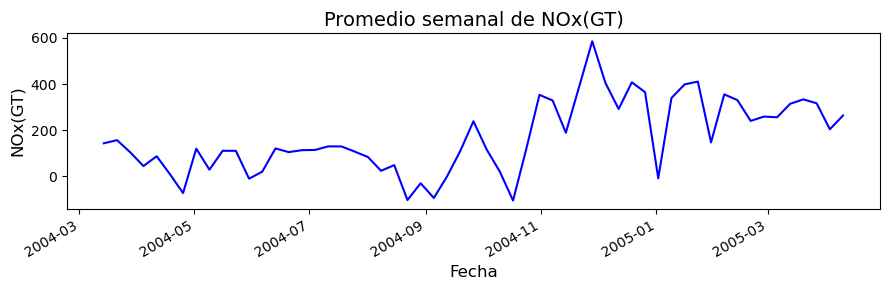

In [6]:
# Convertir la columna 'Date' y 'Time' a formato de fecha y hora
dfAir_filtered['DateTime'] = pd.to_datetime(dfAir_filtered['Date'] + ' ' + dfAir_filtered['Time'], format='%d/%m/%Y %H.%M.%S')

# Establecer la columna 'DateTime' como el índice del DataFrame
dfAir_filtered.set_index('DateTime', inplace=True)

# Agrupar por semana y calcular el promedio semanal de 'NOx(GT)'
weekly_average_nox = dfAir_filtered['NOx(GT)'].resample('W').mean()


# Calcular límites superior e inferior para la sombra
upper_bound_nox = weekly_average_nox 
lower_bound_nox = weekly_average_nox 

# Gráfico con sombra representando la incertidumbre
plt.figure(figsize=(9, 3))

# Línea principal (promedio semanal de NOx(GT))
plt.plot(weekly_average_nox.index, weekly_average_nox, color='blue', label='Promedio semanal de NOx(GT)')

# Etiquetas y título del gráfico
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('NOx(GT)', fontsize=12)
plt.title('Promedio semanal de NOx(GT)', fontsize=14)

# Formato de fechas en el eje x
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Resumen
Basándome en el gráfico presentado que muestra el promedio semanal de concentración de NOx(GT):

La concentración promedio semanal de NOx(GT) a lo largo del tiempo ofrece una visión general de las tendencias y fluctuaciones en la contaminación por óxidos de nitrógeno en el área estudiada. La inclusión de límites superior e inferior mediante sombreado resalta la variabilidad y la incertidumbre asociadas con estas mediciones.

En esta representación, se puede observar si hay cambios significativos en la concentración de NOx(GT) a lo largo de diferentes semanas, identificar patrones estacionales o tendencias a largo plazo, y evaluar la consistencia o la variabilidad de los datos recopilados. La visualización permite una comprensión más profunda de la calidad del aire en función de la concentración de NOx(GT) a lo largo del tiempo y facilita la identificación de posibles períodos de mayor o menor contaminación.

### Observaciones
Se puede notar un gran incremento de los Nox para la temporada invernal. Determinando que las posibles fuentes de calefaccion pueden ser del tipo combustibles fosiles.
Tambien nos pone en contexto que estos datos fueron tomados de un punto en el emisferio norte

## Relacion de CO2 y Temperatura

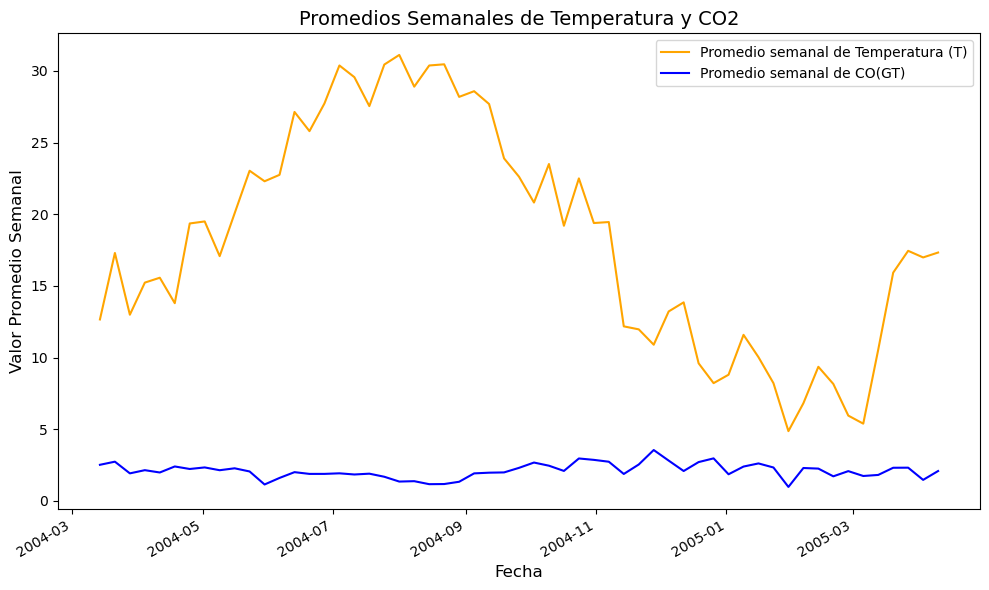

In [14]:
# Convertir la columna 'Date' y 'Time' a formato de fecha y hora
dfAir_filtered['DateTime'] = pd.to_datetime(dfAir_filtered['Date'] + ' ' + dfAir_filtered['Time'], format='%d/%m/%Y %H.%M.%S')

# Establecer la columna 'DateTime' como el índice del DataFrame
dfAir_filtered.set_index('DateTime', inplace=True)

# Eliminar valores de CO menores a cero
dfAir_filtered = dfAir_filtered[dfAir_filtered['CO(GT)'] >= 0]

# Calcular promedios semanales para 'T' y 'CO(GT)'
weekly_avg_T = dfAir_filtered['T'].resample('W').mean()
weekly_avg_CO = dfAir_filtered['CO(GT)'].resample('W').mean()

# Gráfico de línea para los promedios semanales de temperatura y CO2
plt.figure(figsize=(10, 6))

# Variables a graficar
plt.plot(weekly_avg_T.index, weekly_avg_T, label='Promedio semanal de Temperatura (T)', color='orange')
plt.plot(weekly_avg_CO.index, weekly_avg_CO, label='Promedio semanal de CO(GT)', color='blue')

# Etiquetas y título del gráfico
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor Promedio Semanal', fontsize=12)
plt.title('Promedios Semanales de Temperatura y CO2', fontsize=14)

# Leyenda
plt.legend()

# Formato de fechas en el eje x
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Resumen
El código procesa datos de calidad del aire, convierte fechas, filtra CO negativo y calcula promedios semanales de temperatura y CO. Genera un gráfico de líneas mostrando estos promedios semanales para Temperatura (en naranja) y CO2 (en azul) a lo largo del tiempo.

### Observaciones
Al igual que en el grafico anterior. En este se puede determinar que al existir una epoca del año en el que las temperaturas son menores. los valores de monoxido de carbono tambien son elevados, Incidiendo en que ademas de utilizar combustibles fosiles. Tambien se utiliza combustibles organicos como la madera, que no genera un numero relebante de nox, pero si se quema peor, generando monoxido de carbono